In [1]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# data_path = "/content/drive/My Drive/Colab Notebooks/Ml_projects/1.AQI/Data/AQI"
# project_path =  "/content/drive/My Drive/Colab Notebooks/Ml_projects/1.AQI/"

In [6]:
data_path = "Data/AQI"
project_path =  "1.AQI/"

In [7]:
files = os.listdir(data_path)

In [8]:
for f in files:
    print(f)

aqi2016.csv
aqi2014.csv
aqi2015.csv
aqi2017.csv
aqi2018.csv
aqi2013.csv


In [9]:
def avg_year():
    avg_year_data = []
    for f in files:
        avg_data = []
        year_wise_data = os.path.join(data_path,f)
        for row in pd.read_csv(year_wise_data,chunksize=24):
            data = []
            add_var = 0
            df = pd.DataFrame(data = row)
            for index,row in df.iterrows():
                data.append(row['PM2.5'])
            for i in data:
                if type(i) is float or type(i) is int:
                    add_var +=add_var
                elif type(i) is str:
                    if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                        temp = float(i)
                        add_var +=temp
            avg_data.append(add_var/24)
        avg_year_data.append(avg_data)
    return avg_year_data

In [10]:
data_year_wise = avg_year()

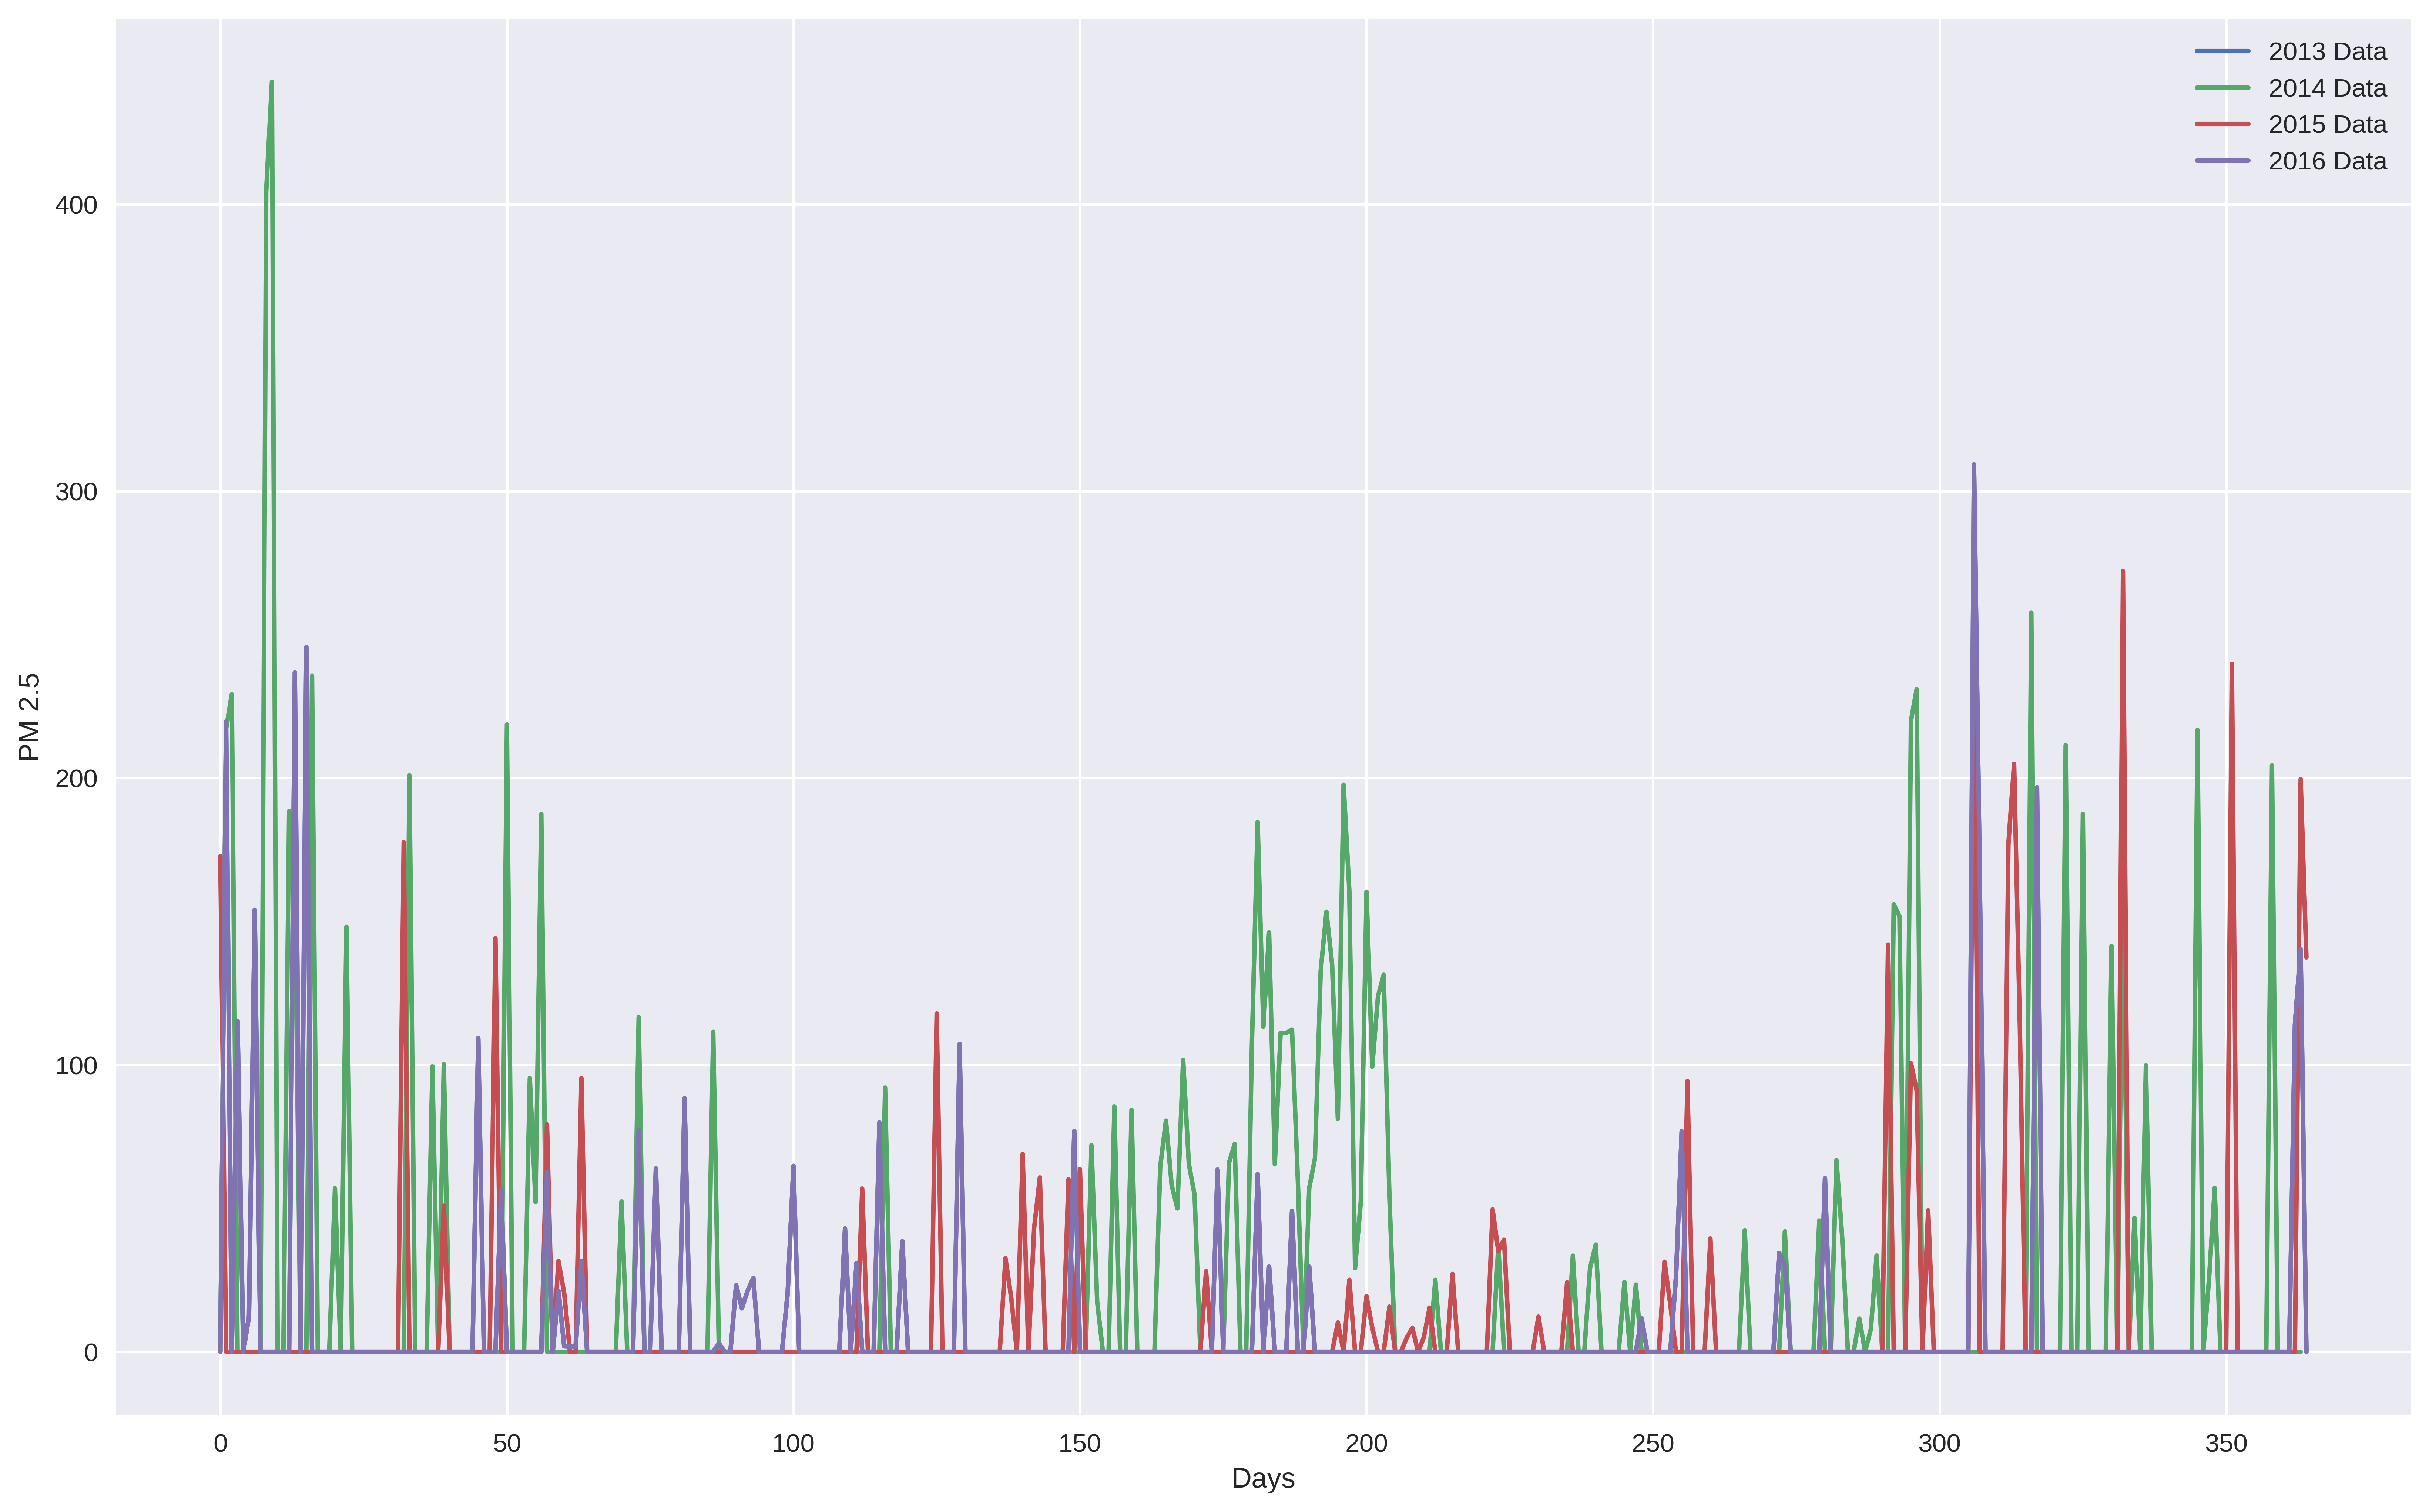

In [12]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(16,10),dpi=500,)
plt.plot(range(len(data_year_wise[0])),data_year_wise[0],label = "2013 Data")
plt.plot(range(len(data_year_wise[1])),data_year_wise[1],label = "2014 Data")
plt.plot(range(len(data_year_wise[2])),data_year_wise[2],label = "2015 Data")
plt.plot(range(len(data_year_wise[3])),data_year_wise[3],label = "2016 Data")
plt.xlabel("Days")
plt.ylabel('PM 2.5')
plt.legend(loc='upper right')
plt.show()